In [ ]:
!gdown https://drive.google.com/uc?id=18WLg4wFXryo2q6FAIeMhTfNPOUojx1Yx

Downloading...
From: https://drive.google.com/uc?id=18WLg4wFXryo2q6FAIeMhTfNPOUojx1Yx
To: /content/soal-TRAINING-VALIDATION-Gemastik2021.rar
100% 238k/238k [00:00<00:00, 71.3MB/s]


In [ ]:
!unrar e soal-TRAINING-VALIDATION-Gemastik2021.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from soal-TRAINING-VALIDATION-Gemastik2021.rar

Extracting  sample_valid_submission.csv                                    1%  OK 
Extracting  train_preprocess.csv                                          80%  OK 
Extracting  valid_preprocess.csv                                          99%  OK 
Extracting  sample_test_submission.csv                                    99%  OK 
All OK


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("train_preprocess.csv")

In [ ]:
df_valid = pd.read_csv("valid_preprocess.csv")

In [ ]:
df_train.head()

,question,passage,seq_label
0,"['Kelompok', 'apakah', 'yang', 'menyatakan', '...","['Lewat', 'telepon', 'ke', 'kantor', 'berita',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,"['Di', 'pulau', 'manakah', ',', 'PT', 'Mutiara...","['Sejak', 'tahun', '1980', '-', 'an', 'di', 'K...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,"['Apakah', 'warna', 'pasir', 'pada', 'pesisir'...","['Titik', 'kedua', 'adalah', 'Pantai', 'Baturu...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,"['Apa', 'nama', 'perusahaan', 'China', 'yang',...","['Sichuan', ',', 'Kompas', '-', 'Pemerintah', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,"['Siapa', 'yang', 'akan', 'memindahkan', 'Patu...","['Jakarta', ',', 'Kompas', '-', 'Patung', 'Kar...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
df_train.shape

(2495, 3)

In [ ]:
df_sample_valid = pd.read_csv("sample_valid_submission.csv")

In [ ]:
type(df_sample_valid.seq_label.values[0])

str

In [ ]:
df_sample_valid.shape

(311, 2)

In [ ]:
# Set seed
def set_seed(s):
  np.random.seed(s)
  random.seed(s)
  tf.random.set_seed(s)
  os.environ['PYTHONHASHSEED'] = '0'
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [ ]:
import matplotlib.pyplot as plt

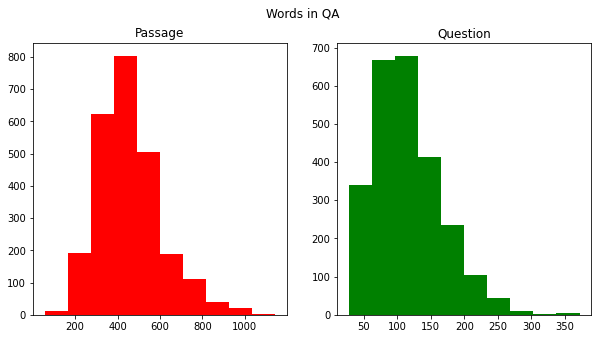

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
pass_len=df_train['passage'].map(lambda x: len(x))
ax1.hist(pass_len,color='red')
ax1.set_title('Passage')
que_len=df_train['question'].map(lambda x: len(x))
ax2.hist(que_len,color='green')
ax2.set_title('Question')
fig.suptitle('Words in QA')
plt.show()

In [ ]:
pass_len

0        259
1        343
2        204
3        365
4        336
        ... 
2490     528
2491    1031
2492     362
2493     345
2494     316
Name: passage, Length: 2495, dtype: int64

In [274]:
df_test = pd.read_csv("test_preprocess_no_label.csv")

In [ ]:
import re

In [ ]:
def sambungin(text):
  text = re.sub("[(\'\[\')|(\'\]\')|(\')+|(,)+]",'',text)
  return text

In [ ]:
df_train.question = df_train.question.apply(sambungin)

In [ ]:
df_valid.question = df_valid.question.apply(sambungin)
df_valid.passage = df_valid.passage.apply(sambungin)

In [276]:
df_test.question = df_valid.question.apply(sambungin)
df_test.passage = df_valid.passage.apply(sambungin)

In [ ]:
df_train.passage = df_train.passage.apply(sambungin)

In [ ]:
df_train.head()

,question,passage,seq_label
0,Kelompok apakah yang menyatakan bertanggung ja...,Lewat telepon ke kantor berita lokal Current N...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,Di pulau manakah PT Mutiara Indopearl berloka...,Sejak tahun 1980 - an di Kota Bau-Bau terdapat...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Apakah warna pasir pada pesisir pantai Baturum...,Titik kedua adalah Pantai Baturumah sepanjang ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Apa nama perusahaan China yang bekerja sama de...,Sichuan Kompas - Pemerintah Indonesia dan Chi...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Siapa yang akan memindahkan Patung Kartini dal...,Jakarta Kompas - Patung Kartini di Jalan Tama...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertConfig, BertForQuestionAnswering

In [ ]:
ck = 'indobenchmark/indobert-large-p2'

tokenizer = BertTokenizer.from_pretrained(ck)

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

In [ ]:
max_length = 512 # The maximum length of a feature (question and context)
doc_stride = 256 # The authorized overlap between two part of the context when splitting it is needed.

In [ ]:
from transformers import BertTokenizerFast, pipeline

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained(
    'Wikidepia/indobert-lite-squad'
)

In [ ]:
qa_pipeline = pipeline(
    "question-answering",
    model="Wikidepia/indobert-lite-squad",
    tokenizer=tokenizer
)

In [ ]:
tes = qa_pipeline({
    'context': df_train.passage.values[0],
    'question': df_train.question.values[0]
})

In [275]:
df_test.head()

,question,passage
0,"['Siapakah', 'pelatih', 'ganda', 'putra', 'bul...","['Pelatih', 'ganda', 'putra', ',', 'Christian'..."
1,"['Siapa', 'nama', 'Perdana', 'Menteri', 'Inggr...","['Curtis', 'mengatakan', 'hal', 'itu', 'setela..."
2,"['Berapakah', 'catatan', 'waktu', 'terbaik', '...","['Catatan', 'waktu', 'yang', 'dibuat', 'Darlin..."
3,"['Apakah', 'nama', 'latin', 'dari', 'kijang']","['Dalam', 'waktu', 'sebulan', ',', 'dua', 'hew..."
4,"['Siapa', 'nama', 'presiden', 'Indonesia', 'se...","['Presiden', 'Susilo', 'Bambang', 'Yudhoyono',..."


In [ ]:
ans = []

In [277]:
ans_test = []

In [ ]:
def find_sub_list(sl,l):
    sll=len(sl)
    for ind in (i for i,e in enumerate(l) if e==sl[0]):
        if l[ind:ind+sll]==sl:
            return ind,ind+sll-1

In [ ]:
def cek(text):
  tes = qa_pipeline({
    'context': text.passage,
    'question': text.question
  })
  tokenized = tokenizer.tokenize(text.passage)
  token_test = tokenizer.tokenize(tes['answer'])
  hasil = ['O' for i in range(len(tokenized))]
  start, end = find_sub_list(token_test,tokenized)
  hasil[start] = 'B'
  for y in range(len(hasil)):
    if y > start and y <= end:
      hasil[y] = 'I'
  ans.append(hasil)

In [ ]:
def app(text):
  return ans[text.index]

In [ ]:
df_valid.apply(cek, axis=1)

In [278]:
def cek2(text):
  tes = qa_pipeline({
    'context': text.passage,
    'question': text.question
  })
  tokenized = tokenizer.tokenize(text.passage)
  token_test = tokenizer.tokenize(tes['answer'])
  hasil = ['O' for i in range(len(tokenized))]
  start, end = find_sub_list(token_test,tokenized)
  hasil[start] = 'B'
  for y in range(len(hasil)):
    if y > start and y <= end:
      hasil[y] = 'I'
  ans_test.append(hasil)

In [ ]:
df_test.apply(cek2, axis=1)

In [ ]:
ans_test

In [ ]:
df_valid.drop(df_valid.columns[[2]], axis = 1, inplace = True)

In [ ]:
len(ans)

311

In [ ]:
len(df_valid)

311

In [ ]:
dff = pd.DataFrame()

In [ ]:
import numpy as np

In [ ]:
an

list

In [ ]:
idx = [i for i in range(len(ans))]

In [281]:
idx_test = [i for i in range(len(ans_test))]

In [282]:
mydf_test = pd.DataFrame(list(zip(idx_test, ans_test)), columns = ['Id', 'seq_label'])

In [ ]:
idx

In [270]:
mydf = pd.DataFrame(list(zip(idx, ans)), columns = ['Id', 'seq_label'])

In [271]:
mydf.head()

,Id,seq_label
0,0,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B, ..."
1,1,"[O, O, O, O, O, O, O, O, O, O, B, O, O, O, O, ..."
2,2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,3,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,4,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [283]:
mydf_test.to_csv("DadJokes1412_final.csv", index=False, header=True)

In [ ]:
df_valid.head()

In [ ]:
|df_train.passage.values[0]

'Lewat telepon ke kantor berita lokal Current News Service  Hezb-ul Mujahedeen  kelompok militan Kashmir yang terbesar  menyatakan bertanggung jawab atas ledakan di Srinagar .'

In [ ]:
ckck = df_train.passage.values[0][tes["start"]:tes["end"]]

In [ ]:
tokenizer.tokenize(tes["answer"])

['kelompok', 'militan', 'kas', '##hm', '##ir']